In [1]:
using Pkg
Pkg.activate("/Users/ryansenne/Documents/GitHub/SSM")

  Activating project at `\Users\ryansenne\Documents\GitHub\SSM`

In [2]:
include("/Users/ryansenne/Documents/Github/SSM//src/SSM.jl")
using LinearAlgebra
using Plots
using Distributions
using Random
using .SSM
using StatsBase

In [3]:
# generate data from a Gaussian HMM model
Random.seed!(1234)
function simulate_gaussian_hmm(n, transition_mat, means, covariances)
    # Number of states
    K = size(transition_mat, 1)
    
    # Initialize state and observation arrays
    states = Vector{Int}(undef, n)
    observations = Matrix{Float64}(undef, n, size(means[1], 1))
    
    # Start with a random state
    states[1] = rand(1:K)
    
    # Generate first observation
    observations[1, :] = rand(MvNormal(means[states[1]], covariances[states[1]]))
    
    for t in 2:n
        # Transition to a new state
        states[t] = sample(1:K, Weights(transition_mat[states[t-1], :]))
        
        # Generate observation
        observations[t, :] = rand(MvNormal(means[states[t]], covariances[states[t]]))
    end
    
    return states, observations
end

# Given parameters
Random.seed!(1234)
transition_mat = [0.95 0.05; 0.05 0.95]
means = [[0.0, 3.0], [1.0, 2.2]]
covariances = [[0.5 0.0; 0.0 0.5], [1 0.0; 0.0 1]]

# Simulate for, say, 100 time steps
n = 1000
states, observations = simulate_gaussian_hmm(n, transition_mat, means, covariances)

([1, 1, 2, 2, 1, 1, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0.7687724975598563 2.703305336547074; 0.2971596291924898 2.5151574553382576; … ; -0.4724324468602682 2.7006070184381916; -0.07193134023382404 3.2111831801057917])

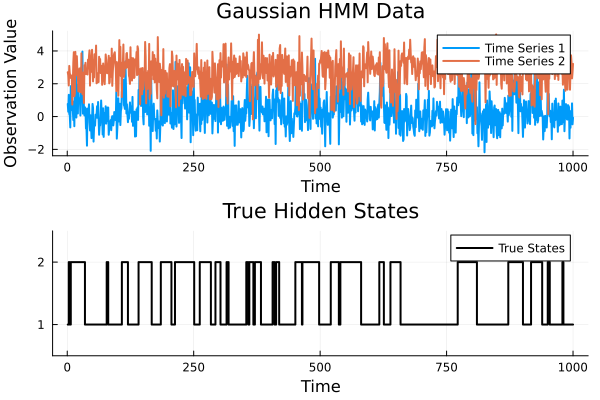

In [4]:
function plot_hmm_data(observations, states)
    # Create a new plot with the first time series
    p1 = plot(observations[:, 1], label="Time Series 1", legend=:topright, title="Gaussian HMM Data", xlabel="Time", ylabel="Observation Value", linewidth=2)
    # Add the second time series to the same plot
    plot!(observations[:, 2], label="Time Series 2", linewidth=2)

    # Plot the true states below
    p2 = plot(states, line=:steppost, label="True States", title="True Hidden States", xlabel="Time", ylims=(0.5, 2.5), yticks=[1, 2], linewidth=2, color=:black)

    # Display the plots vertically aligned
    plot(p1, p2, layout=(2, 1), link=:x)
end

plot_hmm_data(observations, states)

In [5]:
model = HMM(observations, 2, "Gaussian")

HMM{GaussianEmission}([0.4140624518716696 0.5859375481283303; 0.7772351160345606 0.2227648839654394], GaussianEmission[GaussianEmission([0.8563717561339409, 3.575841505470118], [1.0 0.0; 0.0 1.0]), GaussianEmission([1.7590525136086503, 4.752260869683324], [1.0 0.0; 0.0 1.0])], [0.010266023624404175, 0.9897339763755958], 2)

In [6]:
baumWelch!(model, observations, 100)

In [7]:
viterbi(model, observations)

1000-element Vector{Int64}:
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [8]:
model

HMM{GaussianEmission}([0.9647110739101143 0.035288926089883536; 0.044817485243260465 0.9551825147567432], GaussianEmission[GaussianEmission([-0.03845751777000481, 3.0346092846974115], [0.4761570831406592 0.016086009264556826; 0.016086009264556826 0.53703011479781]), GaussianEmission([0.9437606325035194, 2.2493384699412355], [1.1015668520576927 -0.04265811000460066; -0.04265811000460066 0.9659596089660928])], [5.412670359909199e-7, 0.9999994587330193], 2)